In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [14]:
# Define the path to the directory containing the text files
data_dir = "D:\\Nikhil\\TrainingInstances_1_49999"

In [15]:
# Load the data into memory for fc
data = []
i = 0
num_files = 10000
for filename in os.listdir(data_dir):
    i+=1
    with open(os.path.join(data_dir, filename), "r") as f:
        content = f.read().splitlines()
#         content = [float(x) for x in content]
        for line in content:
            val = line.split(' ')
            data_p = [float(x) for x in val]
            
            data.append(data_p)
            
            
    if i == 10000:
        break
            
            
data = np.array(data)

In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the dataset
standardized_dataset = scaler.fit_transform(data)

In [17]:
data_df = pd.DataFrame(data, columns=['Value 1', 'Value 2'])

In [18]:
data_df.head(10)

,Value 1,Value 2
0,61.0,590.0
1,192.0,10.0
2,228.0,3.0
3,346.0,16.0
4,433.0,6.0
5,195.0,14.0
6,168.0,14.0
7,402.0,15.0
8,182.0,8.0
9,372.0,4.0


In [19]:
data_sdf = pd.DataFrame(standardized_dataset, columns=['Value 1', 'Value 2'])

In [20]:
data_sdf.head(10)

,Value 1,Value 2
0,-1.682288,7.409368
1,-0.759128,-0.103075
2,-0.505435,-0.193742
3,0.326113,-0.025360
4,0.939204,-0.154885
5,-0.737987,-0.051265
6,-0.928257,-0.051265
7,0.720747,-0.038312
8,-0.829598,-0.128980
9,0.509336,-0.180790


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    standardized_dataset[:, :-1], 
    standardized_dataset[:, -1], 
    test_size=0.2, 
    random_state=42
)

In [22]:
# Define the neural network architecture
input_dim = X_train.shape[1]
output_dim = 1

# Fully trained neural network
model_fc = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=input_dim),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=output_dim)
])

In [23]:
model_fc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_fc.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
h_model_fc = model_fc.fit(X_train, y_train, batch_size= 64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
9493/9493 [==============================] - 14s 1ms/step - loss: 0.8235 - val_loss: 0.8137
Epoch 2/10
9493/9493 [==============================] - 13s 1ms/step - loss: 0.8102 - val_loss: 0.8065
Epoch 3/10
9493/9493 [==============================] - 13s 1ms/step - loss: 0.8048 - val_loss: 0.7998
Epoch 4/10
9493/9493 [==============================] - 13s 1ms/step - loss: 0.7978 - val_loss: 0.7899
Epoch 5/10
9493/9493 [==============================] - 13s 1ms/step - loss: 0.7911 - val_loss: 0.7947
Epoch 6/10
9493/9493 [==============================] - 14s 2ms/step - loss: 0.7886 - val_loss: 0.7879
Epoch 7/10
9493/9493 [==============================] - 14s 1ms/step - loss: 0.7869 - val_loss: 0.7958
Epoch 8/10
9493/9493 [==============================] - 14s 1ms/step - loss: 0.7858 - val_loss: 0.7836
Epoch 9/10
9493/9493 [==============================] - 14s 1ms/step - loss: 0.7857 - val_loss: 0.7971
Epoch 10/10
9493/9493 [==============================] - 14s 1ms/step - l

In [26]:
y_pred_fc = model_fc.predict(X_test)

4747/4747 [==============================] - 5s 1ms/step


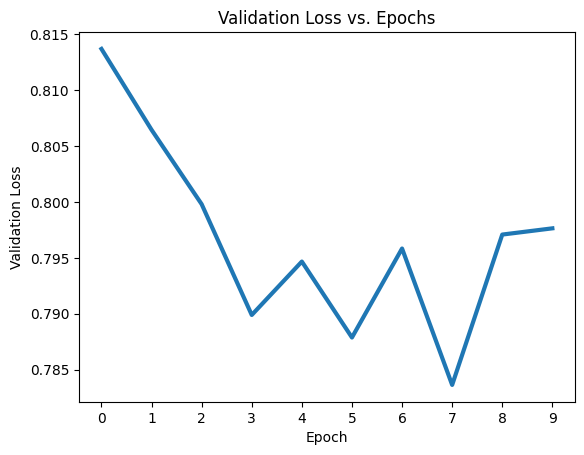

<Figure size 640x480 with 0 Axes>

In [104]:
# Plots
import matplotlib.pyplot as plt
# plot the validation loss against the number of epochs
plt.plot(h_model_fc.history['val_loss'], linewidth = 3)
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.xticks(range(len(h_model_fc.history['val_loss'])))
plt.show()
plt.savefig('fc_validation_loss.png')

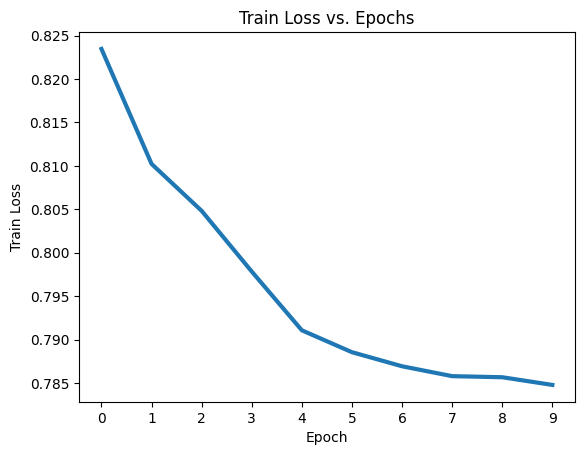

<Figure size 640x480 with 0 Axes>

In [105]:
# Plots
import matplotlib.pyplot as plt
# plot the validation loss against the number of epochs
plt.plot(h_model_fc.history['loss'], linewidth = 3)
plt.title('Train Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.xticks(range(len(h_model_fc.history['loss'])))
plt.show()
plt.savefig('fc_train_loss.png')

In [29]:
# Sparsely trained neural network
model_sc = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=input_dim),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=output_dim, kernel_regularizer=tf.keras.regularizers.l1(0.01))
])

In [30]:
model_sc.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the models
model_sc.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Sparse Information

r = 0.1 # ratio of data kept

# randomly select n row indices
indices = np.random.choice(X_train.shape[0], int(X_train.shape[0] * r), replace=False)

# select the corresponding subset of rows from the dataset
X_train_s = X_train[indices]
y_train_s = y_train[indices]

In [33]:
# Train the models
h_model_sc = model_sc.fit(X_train_s, y_train_s, batch_size= 64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
950/950 [==============================] - 4s 3ms/step - loss: 0.8976 - val_loss: 0.8608
Epoch 2/10
950/950 [==============================] - 3s 3ms/step - loss: 0.8450 - val_loss: 0.8686
Epoch 3/10
950/950 [==============================] - 3s 3ms/step - loss: 0.8401 - val_loss: 0.8413
Epoch 4/10
950/950 [==============================] - 3s 3ms/step - loss: 0.8346 - val_loss: 0.8474
Epoch 5/10
950/950 [==============================] - 3s 3ms/step - loss: 0.8306 - val_loss: 0.8356
Epoch 6/10
950/950 [==============================] - 3s 3ms/step - loss: 0.8299 - val_loss: 0.8532
Epoch 7/10
950/950 [==============================] - 3s 3ms/step - loss: 0.8277 - val_loss: 0.8326
Epoch 8/10
950/950 [==============================] - 3s 3ms/step - loss: 0.8261 - val_loss: 0.8318
Epoch 9/10
950/950 [==============================] - 3s 3ms/step - loss: 0.8255 - val_loss: 0.8297
Epoch 10/10
950/950 [==============================] - 3s 3ms/step - loss: 0.8226 - val_loss: 0.8351

In [34]:
# Generate predictions
y_pred_sc = model_sc.predict(X_test)

4747/4747 [==============================] - 4s 905us/step


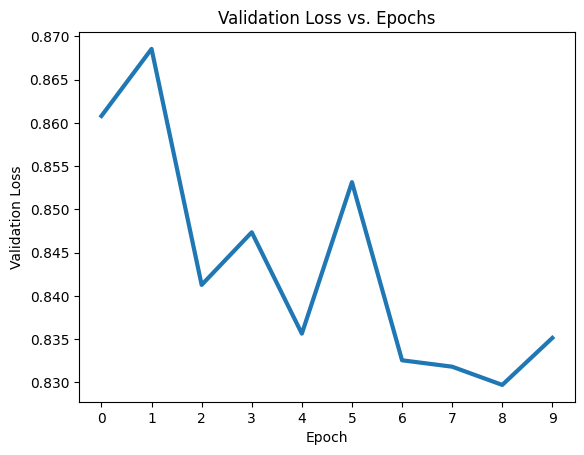

<Figure size 640x480 with 0 Axes>

In [106]:
# Plots
import matplotlib.pyplot as plt
# plot the validation loss against the number of epochs
plt.plot(h_model_sc.history['val_loss'], linewidth = 3)
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.xticks(range(len(h_model_sc.history['val_loss'])))
plt.show()
plt.savefig('sc_validation_loss.png')

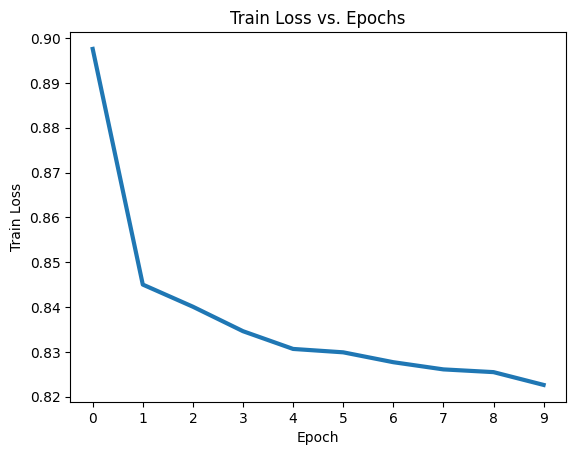

<Figure size 640x480 with 0 Axes>

In [107]:
# Plots
import matplotlib.pyplot as plt
# plot the validation loss against the number of epochs
plt.plot(h_model_sc.history['loss'],linewidth = 3)
plt.title('Train Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.xticks(range(len(h_model_sc.history['loss'])))
plt.show()
plt.savefig('sc_train_loss.png')

In [108]:
import matplotlib.pyplot as plt

def plot_losses(loss1, loss2, title='', xlabel='', ylabel='', legend1='', legend2=''):
    """
    Plots two different losses on the same graph.

    Parameters:
    loss1 (list or ndarray): The first loss values.
    loss2 (list or ndarray): The second loss values.
    title (str): The title of the plot (optional).
    xlabel (str): The label for the x-axis (optional).
    ylabel (str): The label for the y-axis (optional).
    legend1 (str): The legend for the first loss curve (optional).
    legend2 (str): The legend for the second loss curve (optional).
    """
    # create a new figure
    fig = plt.figure()

    # plot the first loss curve
    plt.plot(loss1, label=legend1, linewidth = 3)
#     plt.scatter(loss1, loss2)
    # plot the second loss curve
    plt.plot(loss2, label=legend2, linewidth = 3)


    # add a legend
#     plt.legend(handles=plt.scatter(label=[legend1, legend2]), loc='lower right')

    # set the title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # add a legend
    plt.legend()

    # show the plot
    plt.show()
    plt.savefig(title+'.png')

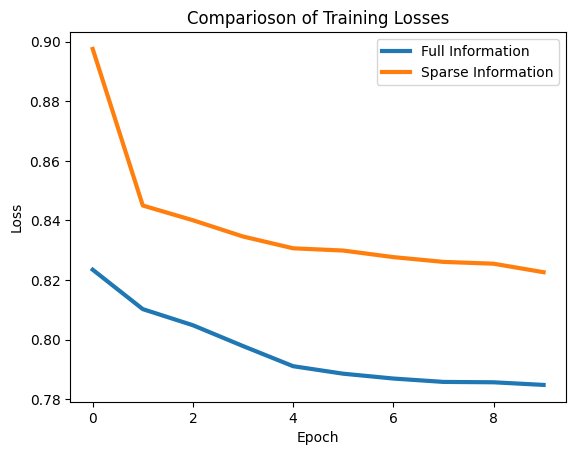

<Figure size 640x480 with 0 Axes>

In [109]:
import numpy as np

# Training loss comparison
loss1 = h_model_fc.history['loss']
loss2 = h_model_sc.history['loss']

# plot the loss curves using the function
plot_losses(
    loss1, 
    loss2, 
    title='Comparioson of Training Losses', 
    xlabel='Epoch', 
    ylabel='Loss', 
    legend1='Full Information', 
    legend2='Sparse Information'
)

plt.savefig('sc_validation_loss.png')

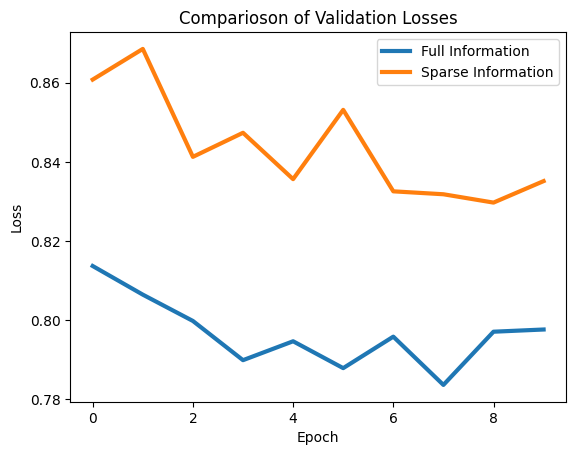

<Figure size 640x480 with 0 Axes>

In [110]:
import numpy as np

# Training loss comparison
loss1 = h_model_fc.history['val_loss']
loss2 = h_model_sc.history['val_loss']

# plot the loss curves using the function
plot_losses(
    loss1, 
    loss2, 
    title='Comparioson of Validation Losses', 
    xlabel='Epoch', 
    ylabel='Loss', 
    legend1='Full Information', 
    legend2='Sparse Information'
)

In [111]:
import sklearn

sklearn.metrics.mean_squared_error(y_pred_fc, y_test)

0.7976380472410975

In [112]:
sklearn.metrics.mean_squared_error(y_pred_sc, y_test)

0.8211076251421383

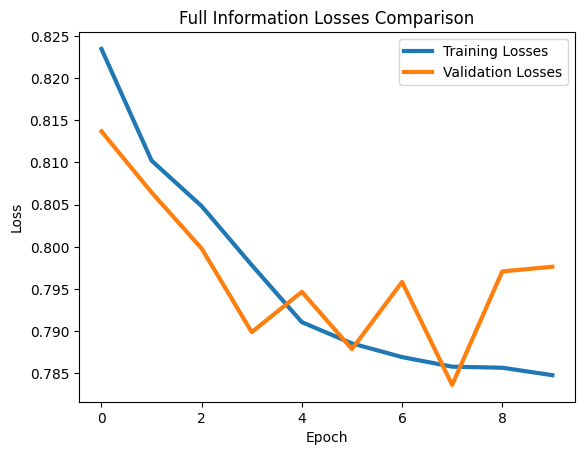

<Figure size 640x480 with 0 Axes>

In [115]:
'''
model_fc
'''
# Training and validation loss comparison 
loss1 = h_model_fc.history['loss']
loss2 = h_model_fc.history['val_loss']

plot_losses(
    loss1, 
    loss2, 
    title='Full Information Losses Comparison', 
    xlabel='Epoch', 
    ylabel='Loss', 
    legend1='Training Losses', 
    legend2='Validation Losses'
)

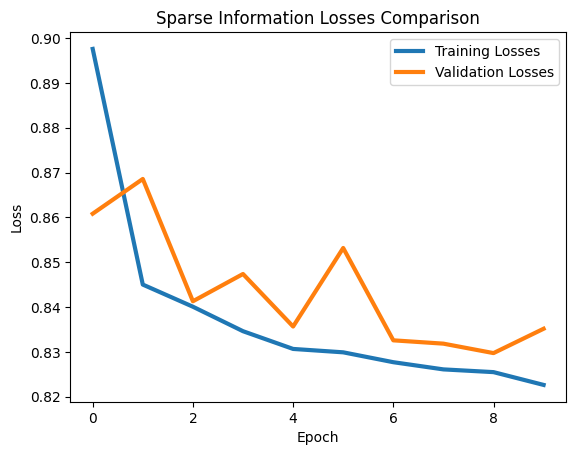

<Figure size 640x480 with 0 Axes>

In [120]:
'''
model_sc
'''
# Training and validation loss comparison 
loss1 = h_model_sc.history['loss']
loss2 = h_model_sc.history['val_loss']

plot_losses1(
    loss1, 
    loss2, 
    title='Sparse Information Losses Comparison', 
    xlabel='Epoch', 
    ylabel='Loss', 
    legend1='Training Losses', 
    legend2='Validation Losses'
)

In [121]:
def plot_losses_Combine(loss1, loss2, loss3, loss4, title='', xlabel='', ylabel='', legend1='', legend2='', legend3='', legend4=''):
    """
    Plots four different losses on the same graph.

    Parameters:
    loss1 (list or ndarray): The first loss values.
    loss2 (list or ndarray): The second loss values.
    loss3 (list or ndarray): The third loss values.
    loss4 (list or ndarray): The fourth loss values.
    title (str): The title of the plot (optional).
    xlabel (str): The label for the x-axis (optional).
    ylabel (str): The label for the y-axis (optional).
    legend1 (str): The legend for the first loss curve (optional).
    legend2 (str): The legend for the second loss curve (optional).
    legend3 (str): The legend for the third loss curve (optional).
    legend4 (str): The legend for the fourth loss curve (optional).
    """
    # create a new figure
    fig = plt.figure()

    # set color for all plots
    color1 = 'blue'
    color2 = '#ff7f0e'

    # plot the first loss curve with dashed line
    plt.plot(loss1, label=legend1, linewidth=3, color=color2)

    # plot the second loss curve with dotted line
    plt.plot(loss2, label=legend2, linewidth=3, linestyle='--', color=color1)

    # plot the third loss curve with dash-dot line
    plt.plot(loss3, label=legend3, linewidth=3, color=color2)

    # plot the fourth loss curve with solid line
    plt.plot(loss4, label=legend4, linewidth=3, linestyle='--', color=color1)

    # set the title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # add a legend
    plt.legend()

    # show the plot and save as image
    plt.show()
    plt.savefig(title+'.png')

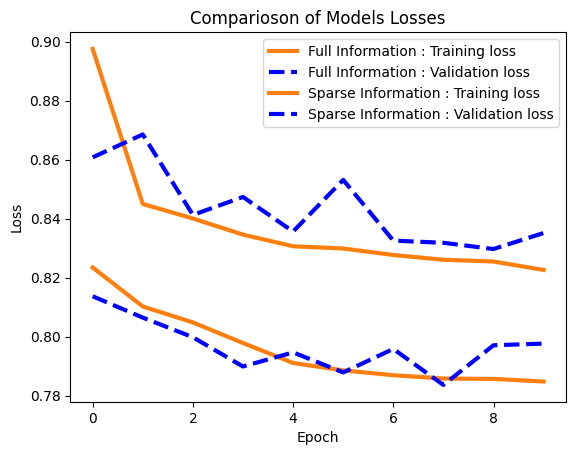

<Figure size 640x480 with 0 Axes>

In [122]:
'''
model comparison
'''
# Training and validation loss comparison 
loss1 = h_model_fc.history['loss']
loss2 = h_model_fc.history['val_loss']
loss3 = h_model_sc.history['loss']
loss4 = h_model_sc.history['val_loss']

plot_losses_Combine(
    loss1, 
    loss2,
    loss3,
    loss4,
    title='Comparioson of Models Losses', 
    xlabel='Epoch', 
    ylabel='Loss', 
    legend1='Full Information : Training loss', 
    legend2='Full Information : Validation loss',
    legend3='Sparse Information : Training loss', 
    legend4='Sparse Information : Validation loss'
)